In [170]:
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive/')
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.svm import SVC

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Problem 1:**

*Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Peform N number of independent training (N=1, ..., K)*

1. Identify the optimum number of K, principal components that achieve the highest classification accuracy.
2. Plot your classification accuracy precision and recall over a different number of Ks.
3. Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.
4. Compare your results against the logistic regression that you have done in homework 3. 


In [171]:
import pandas as pd 
from sklearn.datasets import load_breast_cancer
BC = load_breast_cancer()
BC_DATA = BC.data
BC_DATA.shape

(569, 30)

In [172]:
BI=pd.DataFrame(BC_DATA)
BI.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [173]:
BL = BC.target
BL.shape

(569,)

In [174]:
L = np.reshape(BL,(569,1))
FBD = np.concatenate([BC_DATA,L],axis=1)
FBD.shape

(569, 31)

In [175]:
BDST = pd.DataFrame(FBD)
F = BC.feature_names
F

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [176]:
FL = np.append(F,'label')
BDST.columns = FL
BDST.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [177]:
#BDST['label'].replace(0, 'Benign',inplace=True)
#BDST['label'].replace(1, 'Malignant', inplace=True)
#BDST.tail()

In [178]:
Feature_X = BDST.iloc[:,:30].values
Feature_Y = BDST.iloc[:,30].values

from sklearn.model_selection import train_test_split
import random 
X_train, X_test, Y_train, Y_test = train_test_split(Feature_X, Feature_Y, train_size=0.8, test_size=.2, random_state = 4) 

In [179]:
#Standardize the values for overfitting handling 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [180]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', class_weight='balanced', C= 10)
classifier.fit(X_train,Y_train)

SVC(C=10, class_weight='balanced')

In [181]:
Y_Pred = classifier.predict(X_test)

In [182]:
#Model evualtion metrics
from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(Y_test,Y_Pred,labels=[1,0]))
confusion = pd.DataFrame(cm,index =['is cancer', 'is_healthy'],columns=['predicted_cancer','predicted_healty'])
confusion

,predicted_cancer,predicted_healty
is cancer,76,4
is_healthy,0,34


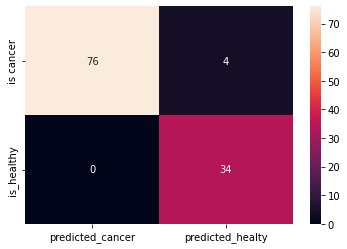

In [183]:
sns.heatmap(confusion,annot=True)

In [184]:
print(classification_report(Y_test,Y_Pred))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        34
         1.0       1.00      0.95      0.97        80

    accuracy                           0.96       114
   macro avg       0.95      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [185]:
#Let's evaluate the model using model evaluation metrics such as accuracy and precision
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test, Y_Pred)
precision = metrics.precision_score(Y_test, Y_Pred)
recall = metrics.recall_score(Y_test, Y_Pred)

avg = (accuracy + precision + recall)/3
    
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:",recall)
print("Average",avg)

Accuracy: 0.9649122807017544
Precision: 1.0
Recall: 0.95
Average 0.9716374269005849


In [186]:
# First, import the PCA function
# sperate the  features, target and scaler

from sklearn.decomposition import PCA 

x = BDST.loc[:, F].values 
y = BDST.loc[:,['label']].values 
x = StandardScaler().fit_transform(x) 


accuracyGraph = []
precisionGraph = []
recallGraph = []

In [187]:
# to go through all K values
for k in range(1, 31):
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,k+1)]) 
    finalDf = pd.concat([principalDf, BDST[['label']]], axis = 1)
    
    outcome = finalDf.pop("label")
    
    X2 = finalDf.values
    Y2 = outcome.values

    X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, train_size=0.8, test_size = 0.2, random_state = 4) 
 
    
    classifier.fit(X_train, Y_train)
    
    # Creating a prediction 
    Y_pred = classifier.predict(X_test)

    # Using confusion matrix to obtain accuracy and other statistics
    from sklearn.metrics import confusion_matrix 
    cnf_matrix = confusion_matrix(Y_test, Y_pred) 
    from sklearn import metrics
    
    # Variables to hold the Accuracy, Precision, and Recall
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    precision = metrics.precision_score(Y_test, Y_pred)
    recall = metrics.recall_score(Y_test, Y_pred)
    
    # Saving the values to the appropriate list
    accuracyGraph.append(accuracy)
    precisionGraph.append(precision)
    recallGraph.append(recall)
    
    # Averaging the three values for avg
    New_Avg = (accuracy + precision + recall)/3
    print(New_Avg)
    #print(New_Avg)
    if avg < New_Avg: 
        avg = New_Avg
        index = k

0.9214747549625236
0.9143170426065165
0.9220029239766081
0.9432748538011696
0.9716374269005849
0.9787280701754386
0.9716374269005849
0.964546783625731
0.964546783625731
0.964546783625731
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9787280701754386
0.9716374269005849
0.9787280701754386
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849


In [188]:
# Using confusion matrix to obtain accuracy and other statistics
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
from sklearn import metrics 

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("Final K value: ", index )

Accuracy: 0.9649122807017544
Precision: 1.0
Recall: 0.95
Final K value:  6


In [189]:
cm = np.array(confusion_matrix(Y_test,Y_pred,labels=[1,0]))
confusion = pd.DataFrame(cm,index =['is cancer', 'is_healthy'],columns=['predicted_cancer','predicted_healty'])
confusion

,predicted_cancer,predicted_healty
is cancer,76,4
is_healthy,0,34


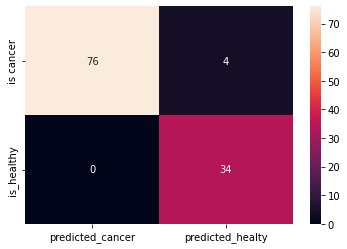

In [190]:
sns.heatmap(confusion,annot=True)

In [191]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        34
         1.0       1.00      0.95      0.97        80

    accuracy                           0.96       114
   macro avg       0.95      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



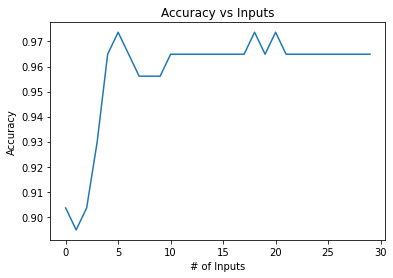

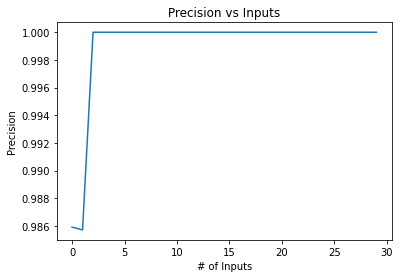

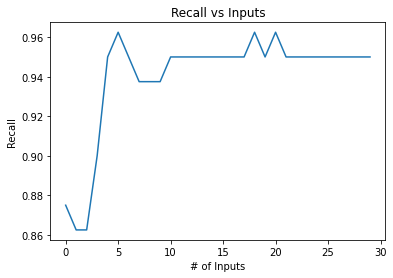

In [192]:
# Graph Accuracy
plt.plot(accuracyGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Inputs')
plt.show()

# Graph Precision
plt.plot(precisionGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Precision')
plt.title('Precision vs Inputs')
plt.show()

# Graph Precision
plt.plot(recallGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Recall')
plt.title('Recall vs Inputs')
plt.show()


In [193]:
pca = PCA(n_components = 12)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,12+1)]) 
finalDf = pd.concat([principalDf, BDST[['label']]], axis = 1)
print(finalDf)
outcome = finalDf.pop("label")

X2 = finalDf.values
Y2 = outcome.values

X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, train_size=0.8, test_size = 0.2, random_state = 4) 


classifier.fit(X_train, Y_train)

# Creating a prediction 
Y_pred = classifier.predict(X_test)

# Using confusion matrix to obtain accuracy and other statistics
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
from sklearn import metrics

# Variables to hold the Accuracy, Precision, and Recall
accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
recall = metrics.recall_score(Y_test, Y_pred)

             1          2         3         4         5         6         7  \
0     9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411424  2.159370   
1     2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028656  0.013359   
2     5.733896  -1.075174 -0.551748  0.912083 -0.177086  0.541452 -0.668166   
3     7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053422  1.429911   
4     3.935302  -1.948072  1.389767  2.940639  0.546747 -1.226495 -0.936213   
..         ...        ...       ...       ...       ...       ...       ...   
564   6.439315  -3.576817  2.459487  1.177314 -0.074824 -2.375193 -0.596130   
565   3.793382  -3.584048  2.088476 -2.506028 -0.510723 -0.246710 -0.716326   
566   1.256179  -1.902297  0.562731 -2.089227  1.809991 -0.534447 -0.192758   
567  10.374794   1.672010 -1.877029 -2.356031 -0.033742  0.567936  0.223081   
568  -5.475243  -0.670637  1.490443 -2.299157 -0.184703  1.617837  1.698951   

            8         9        10        11        

In [194]:
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))
plt.rcParams["figure.figsize"] = (12,8)


              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        34
         1.0       1.00      0.95      0.97        80

    accuracy                           0.96       114
   macro avg       0.95      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

[[34  0]
 [ 4 76]]


**Problem 2:**

*Develop a SVR regression model that predicts housing price based on the following input variables:*

*Area, bedrooms,bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea.*

1. Plot your regression model for SVR similar to the sample code provided on Canvas.
2. Compare your results against linear regression with regularization loss that you already did in homework 1.
3. Use the PCA feature extraction for your training. Perform N number of independent training (N = 1, .... K.) Identify the optimum number of K, principal components that achieve the highest regression accuracy.
4. Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.

In [195]:
##Import Data Set
data_set_file_path ='/content/drive/MyDrive/Intro to Machine Learning/Housing.csv'

## Read CSV & Print
csv = pd.read_csv(data_set_file_path)
print(csv.shape)

## Set Data Frame
df = pd.DataFrame(csv)
print(df.head)


(545, 13)
<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no 

In [196]:
# Need to make binary categories useful.
def useful_category(df):
    tempDF = df
    col = df.columns.tolist()
    types = df.dtypes
    for i in range(len(col)):

        if types[i] == 'object' or types[i] == 'str':
            tempDF[col[i]] = df[col[i]].astype('category').cat.codes
        else: 
            tempDF[col[i]] = df[col[i]]
    return tempDF
    
df = useful_category(df)
print(df.head)

<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0          

In [197]:
col_p1 = ['area', 'bedrooms', 'bathrooms', 'stories','mainroad','guestroom','basement', 'hotwaterheating','airconditioning','parking','prefarea']
#Set Inputs & Outputs
Input = df[col_p1]
Output = df.loc[:, df.columns == 'price']



In [198]:
X_train, X_test, Y_train, Y_test = train_test_split(Input, Output, train_size=0.8, test_size=.2, random_state = 4) 
#Standardize the values for overfitting handling 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_Y  = StandardScaler()
Y_train = sc_Y.fit_transform(Y_train)
Y_test = sc_Y.fit_transform(Y_test)

In [199]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='poly', C=1e3)
#svr_lin = SVR(kernel='linear', C=10.0)
#svr_poly = SVR(kernel='poly', C=10.0)
Y_RBF = svr_rbf.fit(X_train, Y_train).predict(X_test)
#Y_LIN = svr_lin.fit(X_train, Y_train).predict(X_test)
#Y_POLY = svr_poly.fit(X_train, Y_train).predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [200]:
#lw = 2
#plt.scatter(X_train, Y_train, color = 'darkorange', label = 'data')
#plt.plot(X_train, Y_RBF, color = 'navy', lw=lw, label = 'RBF Model')
#plt.plot(X_train, Y_LIN, color = 'c', lw=lw, label = 'Linear Model')
#plt.plot(X_train, Y_POLY, color = 'cornflowerblue', lw=lw, label = 'Polynomial')
#plt.xlabel('data')
#plt.ylabel('target')
#plt.title('Support Vector Regression')
#plt.legend()
#plt.show()


In [201]:
from sklearn.metrics import r2_score

print(Y_RBF[:10])
print(Y_test[:10])
print('Test R^2     : %.3f'%r2_score(Y_test, Y_RBF))
print('Test R^2     : %.3f'%svr_rbf.score(X_test, Y_test))
print('Training R^2 : %.3f'%svr_rbf.score(X_train, Y_train))
R2 = svr_rbf.score(X_train,Y_train)

[ -0.99342854  -1.25774003  32.36185674 -14.01024613  -0.53520145
  -0.30163172  -0.87780847  -1.04952348  -0.29476585  -0.59461994]
[[-1.04496999]
 [-0.28106783]
 [ 1.24673648]
 [-0.20271889]
 [-1.26042957]
 [-0.06560825]
 [-0.22230613]
 [-0.28106783]
 [-0.94703382]
 [ 0.02841048]]
Test R^2     : -11.004
Test R^2     : -11.004
Training R^2 : 0.866


In [202]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

print('Test MSE  : %.3f'%mean_squared_error(Y_test, Y_RBF))
print('Train MSE : %.3f'%mean_squared_error(Y_train, svr_rbf.predict(X_train)))

Test MSE  : 12.004
Train MSE : 0.134


In [203]:
# First, import the PCA function
# sperate the  features, target and scaler

from sklearn.decomposition import PCA 
import pandas as pd
Input  = df[col_p1]
Output = df.loc[:, df.columns == 'price'] 
Input  = StandardScaler().fit_transform(Input) 
Output = StandardScaler().fit_transform(Output)
Output = Output.flatten()
Output_Series = pd.Series(Output)


In [204]:
from sklearn.svm import SVR
classifier = SVR(kernel = 'linear', C= 10)

r2GraphTrain = []
r2GraphPred = []
r2GraphTest = []

In [205]:
# to go through all K values
for k in range(1, 12):
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(Input)
    principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,k+1)]) 
    finalDf = pd.concat([principalDf, Output_Series], axis = 1)
    #print(finalDf)
    
    outcome = finalDf.pop(1)
    
    X2 = finalDf.values
    Y2 = outcome.values

    X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, train_size=0.8, test_size = 0.2, random_state = 4) 
 
    
    classifier.fit(X_train, Y_train)
    
    # Creating a prediction 
    Y_pred = classifier.predict(X_test)

    
    # Variables to hold the Accuracy, Precision, and Recall
    NewR2= classifier.score(X_train, Y_train)
    print(NewR2)
    R2Pred = r2_score(Y_test, Y_pred)
    R2Test = classifier.score(X_test, Y_test)
    # Saving the values to the appropriate list
    
   
    r2GraphTest.append(R2Test)
    r2GraphTrain.append(NewR2)
    r2GraphPred.append(R2Pred)
    
    # Averaging the three values for avg
    if  R2 < NewR2: 
        R2 = NewR2
        index = k
#print(index)

0.632289839148053
0.6311563745610884
0.6333634113472887
0.6373254588752599
0.6378742843169372
0.638716372170637
0.6404744809954928
0.6405515731408074
0.6441083531022096
0.6433163188559332
0.6441847273985546


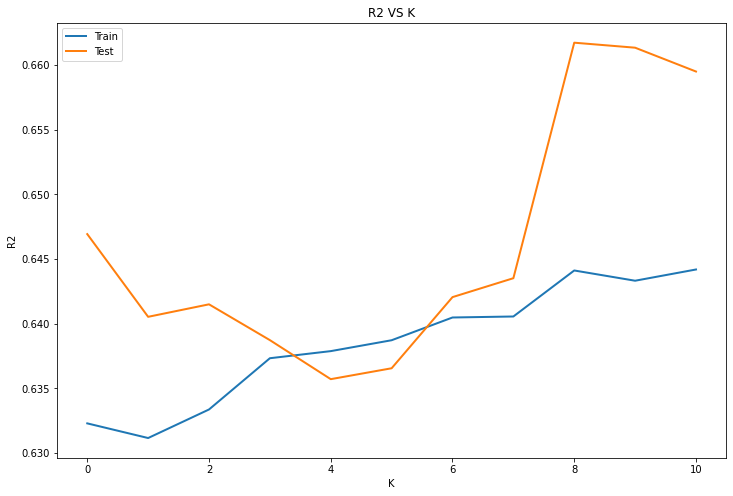

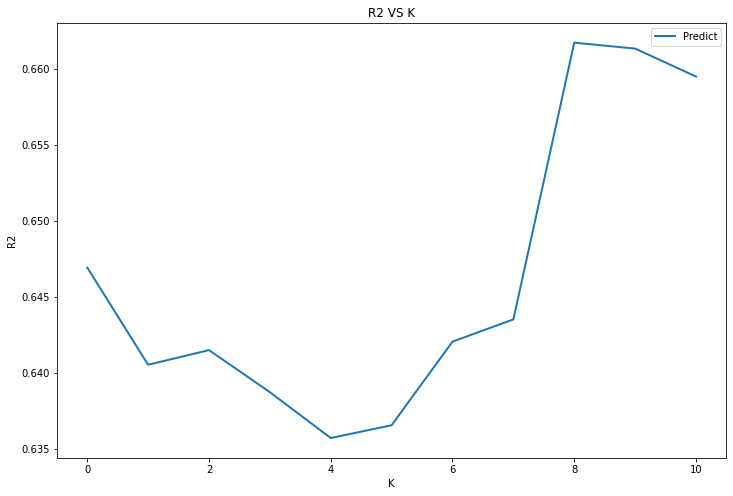

In [206]:
# Graph Accuracy
lw = 2
plt.plot(r2GraphTrain, lw = lw, label = "Train")
plt.plot(r2GraphTest, lw = lw, label = "Test")
plt.xlabel('K')
plt.ylabel('R2')
plt.title('R2 VS K')
plt.legend()
plt.show()
plt.plot(r2GraphPred, lw=lw, label = "Predict")
plt.xlabel('K')
plt.ylabel('R2')
plt.title('R2 VS K')
plt.legend()
